# Sarcasm and Irony detection
### RNN and LSTM

Dataset reference: https://www.kaggle.com/datasets/nikhiljohnk/tweets-with-sarcasm-and-irony

Name: Lucrezia Labardi

#### Import of libraries and dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/UNI MAGISTRALE/Machine Learning/Labardi ML Exam

/content/drive/MyDrive/UNI MAGISTRALE/Machine Learning/exam


In [ ]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import torchtext
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn
import pandas as pd
import random

# import import_ipynb
import utils

from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

# to get reproducible results:
torch.manual_seed(1234)
np.random.seed(1234)

In [ ]:
# did not import the original dataset but the preprocessed version
X = pd.read_csv("data/df_all.csv")
y = pd.read_csv("data/y_clean.csv")
X_test = pd.read_csv("data/df_test_all.csv")
y_test = pd.read_csv("data/ytest_clean.csv")

In [ ]:
X

,tweets,class,text,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_clean,text_all_clean,n_char,n_words,avg_len_words
0,Be aware dirty step to get money #staylight ...,figurative,be aware dirty step to get money #staylight ...,1,0,4,0,0,0,be aware dirty step to get money #staylight ...,be aware dirty step to get money staylight sta...,64.0,11.0,5.818182
1,#sarcasm for #people who don't understand #diy...,figurative,#sarcasm for #people who don't understand #diy...,1,0,4,0,0,0,#sarcasm for #people who dont understand #diy ...,sarcasm for people who dont understand diy art...,45.0,8.0,5.625000
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,#dailymail readers being sensible as always #s...,0,2,6,0,0,0,#dailymail readers being sensible as always #s...,dailymail readers being sensible as always sho...,89.0,11.0,8.090909
3,@wilw Why do I get the feeling you like games?...,figurative,why do i get the feeling you like games? #sarcasm,0,1,1,0,0,1,why do i get the feeling you like games #sarcasm,why do i get the feeling you like games sarcasm,38.0,10.0,3.800000
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,- you probably just missed the text. #sarcastic,0,2,1,0,0,0,you probably just missed the text #sarcastic,you probably just missed the text sarcastic,37.0,7.0,5.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81349,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,photo: image via we heart it #childhood #cool...,1,0,4,0,0,0,photo image via we heart it #childhood #cool ...,photo image via we heart it childhood cool fun...,47.0,10.0,4.700000
81350,I never knew..I better put this out to the Uni...,sarcasm,i never knew..i better put this out to the uni...,1,0,2,0,0,0,i never knewi better put this out to the unive...,i never knewi better put this out to the unive...,88.0,20.0,4.400000
81351,hey just wanted to say thanks @ puberty for le...,sarcasm,hey just wanted to say thanks @ puberty for le...,0,0,2,0,0,0,hey just wanted to say thanks puberty for let...,hey just wanted to say thanks puberty for lett...,102.0,23.0,4.434783
81352,I'm sure coverage like the Fox News Special “T...,sarcasm,i'm sure coverage like the fox news special “t...,1,0,1,0,0,0,im sure coverage like the fox news special the...,im sure coverage like the fox news special the...,88.0,18.0,4.888889


In [ ]:
X_test

,tweets,class,text,url,tags,num_hashtags,emojis,num_special,num_excl_quest,text_clean,text_all_clean,n_char,n_words,avg_len_words
0,no one ever predicted this was going to happen...,figurative,no one ever predicted this was going to happen...,1,0,1,0,0,0,no one ever predicted this was going to happen...,no one ever predicted this was going to happen...,45.0,10.0,4.500000
1,@Stooshie its as closely related as Andrews or...,figurative,its as closely related as andrews original cla...,0,1,1,0,0,0,its as closely related as andrews original cla...,its as closely related as andrews original cla...,71.0,13.0,5.461538
2,I find it ironic when Vegans say they love foo...,figurative,i find it ironic when vegans say they love foo...,0,0,1,0,0,0,i find it ironic when vegans say they love foo...,i find it ironic when vegans say they love foo...,43.0,11.0,3.909091
3,Quick rt that throwing money vine I've not see...,figurative,quick rt that throwing money vine i've not see...,0,0,1,0,0,0,quick rt that throwing money vine ive not seen...,quick rt that throwing money vine ive not seen...,72.0,18.0,4.000000
4,"yep, keep adding me to your #devops lists.... ...",figurative,"yep, keep adding me to your #devops lists.... ...",0,0,4,0,0,0,yep keep adding me to your #devops lists #just...,yep keep adding me to your devops lists justsa...,54.0,11.0,4.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,Why yes I will totally submit my photos to a s...,sarcasm,why yes i will totally submit my photos to a s...,0,0,1,0,0,0,why yes i will totally submit my photos to a s...,why yes i will totally submit my photos to a s...,110.0,26.0,4.230769
8115,Test on a Saturday! Thank you uni! #sarcasm @ ...,sarcasm,test on a saturday! thank you uni! #sarcasm @ ...,1,0,1,0,0,2,test on a saturday thank you uni #sarcasm gri...,test on a saturday thank you uni sarcasm griff...,63.0,12.0,5.250000
8116,Listening to @StephenKing's Misery isn't at al...,sarcasm,listening to 's misery isn't at all disconcert...,0,1,1,0,0,0,listening to s misery isnt at all disconcertin...,listening to s misery isnt at all disconcertin...,47.0,9.0,5.222222
8117,@mmcpatt There you go being kind again #sarcas...,sarcasm,there you go being kind again #sarcasm #standu...,0,1,2,0,0,0,there you go being kind again #sarcasm #standu...,there you go being kind again sarcasm standup4...,43.0,8.0,5.375000


In [ ]:
#only select the text part
X_text = X["tweets"]
X_test_text = X_test["tweets"]

#### Preprocessing of the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# encode the labels to numbers
y = le.fit_transform(y["class"])
y_test = le.transform(y_test["class"])

In [ ]:
from sklearn.model_selection import train_test_split

# create a validation set, with size 10% of the training set, stratified
X_text, X_dev_text, y, y_dev = train_test_split(X_text, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
X_text.shape, X_dev_text.shape, X_test_text.shape, y.shape, y_dev.shape, y_test.shape

((73218,), (8136,), (8119,), (73218,), (8136,), (8119,))

In [ ]:
# check the mapping of the label encoder
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Class mapping: {'figurative': 0, 'irony': 1, 'regular': 2, 'sarcasm': 3}


In [ ]:
# initialize a tokenizer and fit it to the training data
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)

# get word index and vocabulary size
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

115767

In [ ]:
# create a reverse word index with 4 more values for special tokens
reverse_word_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_word_index[0] = '[PAD]'
reverse_word_index[1] = '[START]'
reverse_word_index[2] = '[UNK]'
reverse_word_index[3] = '[UNS]'

In [ ]:
# transform the sentences into sequences of numbers (corresponding to the same word index)
seq_train = tokenizer.texts_to_sequences(X_text)
seq_dev = tokenizer.texts_to_sequences(X_dev_text)
seq_test = tokenizer.texts_to_sequences(X_test_text)

In [ ]:
print(max(len(data) for data in seq_train))
print(max(len(data) for data in seq_dev))
print(max(len(data) for data in seq_test))

34
35
31


In [ ]:
seq_test[0] # sentences look like this

[55, 67, 182, 4065, 22, 35, 121, 6, 787, 4, 16, 1, 2, 62210]

In [ ]:
y_test[0]

0

In [ ]:
from torch.nn.utils.rnn import pad_sequence
import torch

#max_len mus be the same for every sequence. I decided to reduce to 30 since the mex length is 34, 34 and 31
max_len = 30

train_data = [sent[:max_len] for sent in seq_train]
dev_data = [sent[:max_len] for sent in seq_dev]
test_data = [sent[:max_len] for sent in seq_test]

x_train = pad_sequence([torch.tensor(sent) for sent in train_data], batch_first=True)
x_dev = pad_sequence([torch.tensor(sent) for sent in dev_data], batch_first=True)
x_test = pad_sequence([torch.tensor(sent) for sent in test_data], batch_first=True)


In [ ]:
x_train[0] # now sentences look like this

tensor([  174,   120,    72,   109,     8,   197,    10,   368,    12,  6914,
            3,   577,   377, 42162,    73,   411,  3847,    62,   577,  7987,
            7,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
print(max(len(data) for data in x_train))
print(max(len(data) for data in x_dev))
print(max(len(data) for data in x_test))

30
30
30


In [ ]:
x_test

tensor([[   55,    67,   182,  ...,     0,     0,     0],
        [  148,    59, 12368,  ...,     0,     0,     0],
        [    9,   186,    20,  ...,     0,     0,     0],
        ...,
        [  479,     6,  6714,  ...,     0,     0,     0],
        [  100,    15,   106,  ...,     0,     0,     0],
        [   48,   551,    18,  ...,     0,     0,     0]])

In [ ]:
def np2iter(x, y, shuffle=True):

  y = torch.tensor(y, dtype=torch.long)


  ds = torch.utils.data.TensorDataset(x, y)
  return torch.utils.data.DataLoader(ds, batch_size=64, shuffle=shuffle)

train_iter = np2iter(x_train, y, shuffle=True)
dev_iter =  np2iter(x_dev, y_dev, shuffle=False)
test_iter =  np2iter(x_test, y_test, shuffle=False)

In [ ]:
# must be 66374 because the vocabulary is 66370 and we added 4 more special tokens
num_words = 115767 + 4

In [ ]:
max_len

30

### Multilayer Perceptron

In [ ]:
class FlatModel(nn.Module):
  def __init__(self, emb_dim=50):
    super(FlatModel, self).__init__()

    self.embeddings = nn.Embedding(num_embeddings=num_words,
                                   embedding_dim=emb_dim, padding_idx=0)

    self.layer = nn.Sequential(nn.Linear(in_features=emb_dim*max_len, out_features=emb_dim),
                                nn.ReLU(),
                                nn.Linear(in_features=emb_dim, out_features=4))


  def forward(self, x):
    x = self.embeddings(x)
    x = torch.flatten(x, start_dim=1, end_dim=- 1)
    return self.layer(x)

In [ ]:
def val_acc(y_pred, y_test):
  y_pred = np.argmax(y_pred, axis=1)
  return accuracy_score(y_pred=y_pred, y_true=y_test)

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.1.0+cu121
True


In [ ]:
flat_model = FlatModel(emb_dim=300)
flat_model = flat_model.cuda()

In [ ]:
history = utils.train(model=flat_model,
              loss=nn.CrossEntropyLoss(),
              val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
              optimizer=torch.optim.Adam(flat_model.parameters(), lr=0.0001),
              train_ds=train_iter,
              dev_ds=dev_iter,
              num_epochs=30,
              early_stopper=utils.EarlyStopper(metric_name="cls", patience=3))

epoch 1 train loss: 0.7266 val_cls: 0.5934 val_acc: 0.6903
tensor(0.5934) None
epoch 2 train loss: 0.5178 val_cls: 0.5969 val_acc: 0.6711
tensor(0.5969) tensor(0.5934)
epoch 3 train loss: 0.4735 val_cls: 0.6386 val_acc: 0.6484
tensor(0.6386) tensor(0.5934)
epoch 4 train loss: 0.4409 val_cls: 0.7006 val_acc: 0.6072
tensor(0.7006) tensor(0.5934)
EARLY STOPPING 


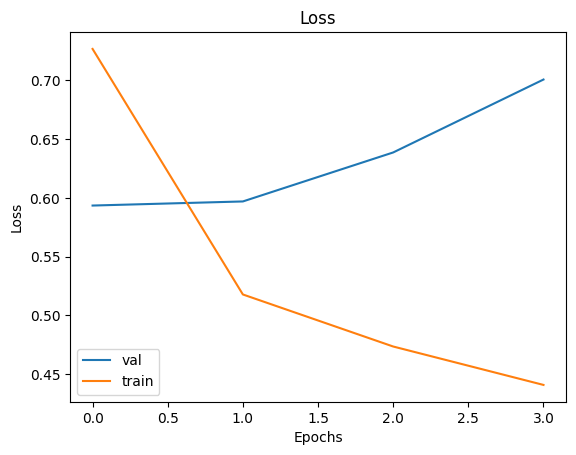

In [ ]:
plt.plot(history['val_cls'],  label='val')
plt.plot(history['train_loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = utils.test(flat_model, test_iter)
pred = np.argmax(pred, axis=1)

pred_true = le.inverse_transform(pred)
y_true = le.inverse_transform(y_test)

print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.18      0.05      0.07      2044
       irony       0.65      0.87      0.75      2111
     regular       0.97      0.98      0.98      1859
     sarcasm       0.67      0.93      0.77      2105

    accuracy                           0.70      8119
   macro avg       0.62      0.71      0.64      8119
weighted avg       0.61      0.70      0.64      8119



In [ ]:
sum(p.numel() for p in flat_model.parameters() if p.requires_grad)

37432804

### Simple RNN

In [ ]:
class SimpleRNN(nn.Module):
  def __init__(self, emb_dim=50):
    super(SimpleRNN, self).__init__()

    self.embeddings = nn.Embedding(num_embeddings=num_words,
                                   embedding_dim=emb_dim, padding_idx=0)

    self.rnn = nn.RNN(input_size=emb_dim, hidden_size=emb_dim, num_layers=1,
                      batch_first=True)

    self.linear_layer = nn.Linear(in_features=emb_dim, out_features=4)


  def forward(self, x):
    # our sequences have different lengths; let's calculate it
    len_x = (x !=0).sum(1)

    x = self.embeddings(x)
    # this function packs our padded sequences and later
    #  makes sure that our RNNs do not read the padded part
    x = pack_padded_sequence(x, len_x.cpu(), batch_first=True,
                             enforce_sorted=False)

    #  we extract the last hidden state
    _, x = self.rnn(x)

    x = x[0]
    return self.linear_layer(x)

In [ ]:
simple_rnn = SimpleRNN(emb_dim=300)

simple_rnn = simple_rnn.cuda()

history = utils.train(model=simple_rnn,
              loss=nn.CrossEntropyLoss(),
              val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
              optimizer=torch.optim.Adam(simple_rnn.parameters(), lr=0.0001),
              train_ds=train_iter,
              dev_ds=dev_iter,
              num_epochs=20,
              early_stopper=utils.EarlyStopper(metric_name="cls", patience=3))

epoch 1 train loss: 0.6387 val_cls: 0.5524 val_acc: 0.7231
tensor(0.5524) None
epoch 2 train loss: 0.5285 val_cls: 0.5244 val_acc: 0.7301
tensor(0.5244) tensor(0.5524)
epoch 3 train loss: 0.5096 val_cls: 0.5224 val_acc: 0.7322
tensor(0.5224) tensor(0.5244)
epoch 4 train loss: 0.5016 val_cls: 0.5268 val_acc: 0.7289
tensor(0.5268) tensor(0.5224)
epoch 5 train loss: 0.4957 val_cls: 0.5194 val_acc: 0.7290
tensor(0.5194) tensor(0.5224)
epoch 6 train loss: 0.4905 val_cls: 0.5238 val_acc: 0.7257
tensor(0.5238) tensor(0.5194)
epoch 7 train loss: 0.4854 val_cls: 0.5342 val_acc: 0.7162
tensor(0.5342) tensor(0.5194)
epoch 8 train loss: 0.4817 val_cls: 0.5370 val_acc: 0.7092
tensor(0.5370) tensor(0.5194)
EARLY STOPPING 


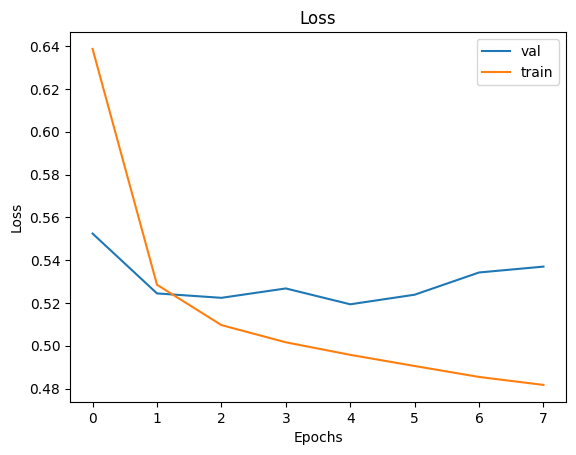

In [ ]:
plt.plot(history['val_cls'],  label='val')
plt.plot(history['train_loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = utils.test(simple_rnn, test_iter)
pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(pred)
print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.23      0.01      0.02      2044
       irony       0.67      0.97      0.79      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.68      0.99      0.80      2105

    accuracy                           0.74      8119
   macro avg       0.64      0.74      0.65      8119
weighted avg       0.63      0.74      0.65      8119



### LSTM

In [ ]:
class LSTM(nn.Module):
  def __init__(self, emb_dim=50):
    super(LSTM, self).__init__()

    self.embeddings = nn.Embedding(num_embeddings=num_words,
                                   embedding_dim=emb_dim, padding_idx=0)

    self.rnn = nn.LSTM(input_size=emb_dim, hidden_size=emb_dim, num_layers=1,
                      batch_first=True)

    self.linear_layer = nn.Linear(in_features=emb_dim, out_features=4)


  def forward(self, x):
    # our sequences have different lengths; let's calculate it
    len_x = (x !=0).sum(1)


    x = self.embeddings(x)

    # this function packs our padded sequences and later
    #  makes sure that our RNNs do not read the padded part
    x = pack_padded_sequence(x, len_x.cpu(), batch_first=True,
                             enforce_sorted=False)
    #  we extract the last hidden state
    _, (x, _) = self.rnn(x)
    x = x[0]
    return self.linear_layer(x)

In [ ]:
lstm = LSTM(emb_dim=300)

lstm = lstm.cuda()

history = utils.train(model=lstm,
              loss=nn.CrossEntropyLoss(),
              val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
              optimizer=torch.optim.Adam(lstm.parameters(), lr=0.0001),
              train_ds=train_iter,
              dev_ds=dev_iter,
              num_epochs=20,
              early_stopper=utils.EarlyStopper(metric_name="cls", patience=3))

epoch 1 train loss: 0.5888 val_cls: 0.5078 val_acc: 0.7377
tensor(0.5078) None
epoch 2 train loss: 0.5010 val_cls: 0.5031 val_acc: 0.7377
tensor(0.5031) tensor(0.5078)
epoch 3 train loss: 0.4958 val_cls: 0.5060 val_acc: 0.7373
tensor(0.5060) tensor(0.5031)
epoch 4 train loss: 0.4922 val_cls: 0.5061 val_acc: 0.7378
tensor(0.5061) tensor(0.5031)
epoch 5 train loss: 0.4875 val_cls: 0.5127 val_acc: 0.7324
tensor(0.5127) tensor(0.5031)
EARLY STOPPING 


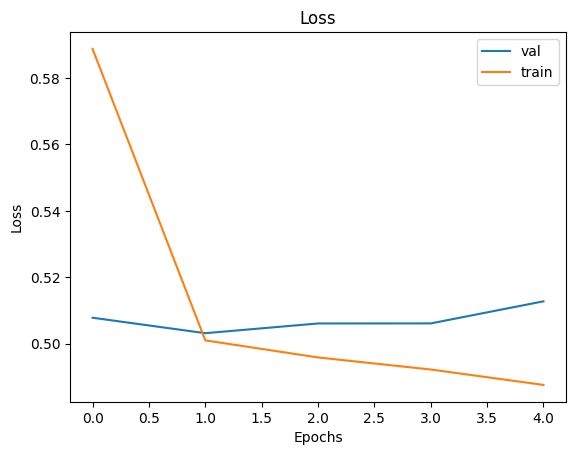

In [ ]:
plt.plot(history['val_cls'],  label='val')
plt.plot(history['train_loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = utils.test(lstm, test_iter)
pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(pred)

print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.25      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.68      1.00      0.81      2105

    accuracy                           0.75      8119
   macro avg       0.65      0.75      0.65      8119
weighted avg       0.64      0.75      0.65      8119



In [ ]:
sum(p.numel() for p in LSTM(300).parameters() if p.requires_grad)

35454904

#### LSTM with pretrained GloVe embeddings

In [ ]:
glove_vectors = torchtext.vocab.GloVe('6B', dim=50)

In [ ]:
lstm = LSTM(emb_dim=300)

emb_matrix = utils.build_embed_matrix(reverse_word_index=reverse_word_index,
                                      dim=300, num_words=num_words)

lstm.embeddings.from_pretrained(emb_matrix, freeze=False)
lstm = lstm.cuda()

history = utils.train(model=lstm,
              loss=nn.CrossEntropyLoss(),
              val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
              optimizer=torch.optim.Adam(lstm.parameters(), lr=0.0001),
              train_ds=train_iter,
              dev_ds=dev_iter,
              num_epochs=20,
              early_stopper=utils.EarlyStopper(metric_name="cls", patience=3))

epoch 1 train loss: 0.5859 val_cls: 0.5081 val_acc: 0.7371
tensor(0.5081) None
epoch 2 train loss: 0.5015 val_cls: 0.5056 val_acc: 0.7376
tensor(0.5056) tensor(0.5081)
epoch 3 train loss: 0.4963 val_cls: 0.5071 val_acc: 0.7370
tensor(0.5071) tensor(0.5056)
epoch 4 train loss: 0.4918 val_cls: 0.5100 val_acc: 0.7341
tensor(0.5100) tensor(0.5056)
epoch 5 train loss: 0.4870 val_cls: 0.5175 val_acc: 0.7259
tensor(0.5175) tensor(0.5056)
EARLY STOPPING 


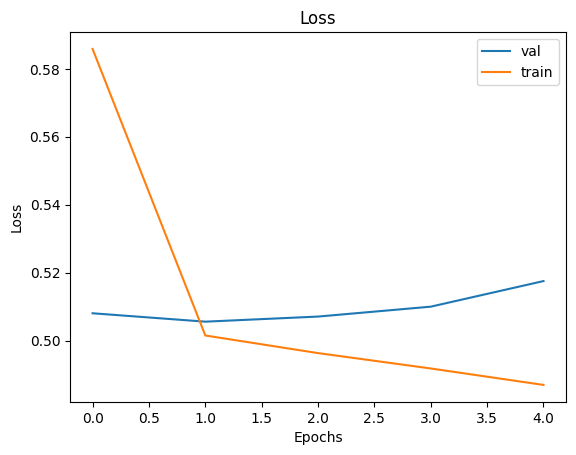

In [ ]:
plt.plot(history['val_cls'],  label='val')
plt.plot(history['train_loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = utils.test(lstm, test_iter)
pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(pred)
print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.14      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.67      1.00      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.62      0.75      0.65      8119
weighted avg       0.61      0.75      0.65      8119



#### LSTM with random embeddings

In [ ]:
lstm = LSTM(emb_dim=300)

lstm.embeddings.weight.requires_grad = False

lstm = lstm.cuda()

history = utils.train(model=lstm,
              loss=nn.CrossEntropyLoss(),
              val_metrics={"cls": nn.CrossEntropyLoss(), "acc": val_acc},
              optimizer=torch.optim.Adam(lstm.parameters(), lr=0.0001),
              train_ds=train_iter,
              dev_ds=dev_iter,
              num_epochs=20,
              early_stopper=utils.EarlyStopper(metric_name="cls", patience=3))

epoch 1 train loss: 0.5862 val_cls: 0.5085 val_acc: 0.7371
tensor(0.5085) None
epoch 2 train loss: 0.5018 val_cls: 0.5049 val_acc: 0.7372
tensor(0.5049) tensor(0.5085)
epoch 3 train loss: 0.4976 val_cls: 0.5048 val_acc: 0.7362
tensor(0.5048) tensor(0.5049)
epoch 4 train loss: 0.4947 val_cls: 0.5057 val_acc: 0.7362
tensor(0.5057) tensor(0.5048)
epoch 5 train loss: 0.4918 val_cls: 0.5058 val_acc: 0.7364
tensor(0.5058) tensor(0.5048)
epoch 6 train loss: 0.4893 val_cls: 0.5088 val_acc: 0.7365
tensor(0.5088) tensor(0.5048)
EARLY STOPPING 


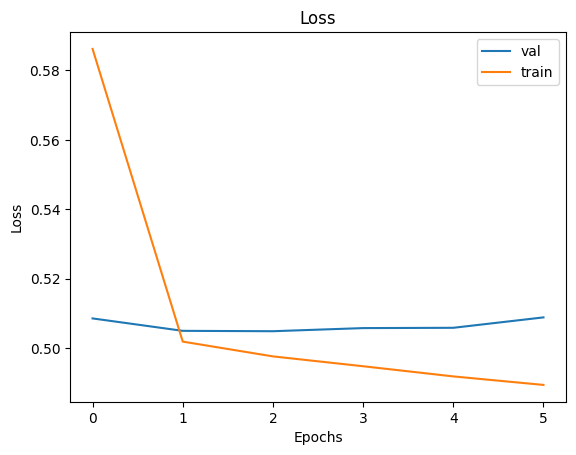

In [ ]:
plt.plot(history['val_cls'],  label='val')
plt.plot(history['train_loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred = utils.test(lstm, test_iter)
pred = np.argmax(pred, axis=1)
pred_true = le.inverse_transform(pred)

print(classification_report(y_pred=pred_true, y_true=y_true))

              precision    recall  f1-score   support

  figurative       0.21      0.00      0.00      2044
       irony       0.67      1.00      0.80      2111
     regular       1.00      1.00      1.00      1859
     sarcasm       0.67      0.99      0.80      2105

    accuracy                           0.75      8119
   macro avg       0.64      0.75      0.65      8119
weighted avg       0.63      0.75      0.65      8119

